# Goal: Predict value of car sale
Based on blog post [here](https://datascienceplus.com/keras-regression-based-neural-networks/).

In [40]:
import numpy as np
import pandas
import boto3
import datetime
import matplotlib.pyplot as plt

s3 = boto3.client('s3')


def get_csv_from_s3(key, bucket="intuitiveml-data-sets"):
    obj = s3.get_object(Bucket=bucket, Key=key)
    return pandas.read_csv(obj["Body"])


def get_obj_s3(key, bucket="intuitiveml-data-sets"):
    obj = s3.get_object(Bucket=bucket, Key=key)["Body"]
    return obj

In [3]:
df = get_csv_from_s3("cars.csv")

In [38]:
df.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [39]:
df.shape

(963, 6)

In [31]:
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [29]:
dataset = df.to_numpy()
x = dataset[:, 0:5]
y = dataset[:, 5]
y = np.reshape(y, (-1, 1))

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
x_scale = scaler_x.transform(x)
print(scaler_y.fit(y))
y_scale = scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


In [34]:
X_train, X_test, y_train, y_test = train_test_split(x_scale, y_scale)

# Configure Keras Model

In [35]:
model = Sequential([
    Dense(12, input_dim=5, kernel_initializer="normal", activation="relu"),
    Dense(8, activation="relu"),
    Dense(1, activation="linear")
])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.compile(
    loss="mse",
    optimizer="adam",
    metrics=["mse", "mae"]
)

# Fit Model

In [37]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=150, 
    batch_size=50,  
    verbose=1, 
    validation_split=0.2
)

Instructions for updating:
Use tf.cast instead.
Train on 577 samples, validate on 145 samples
Epoch 1/150
577/577 [==============================] - 0s 231us/step - loss: 0.1992 - mse: 0.1992 - mae: 0.3341 - val_loss: 0.1410 - val_mse: 0.1410 - val_mae: 0.2786
Epoch 2/150
577/577 [==============================] - 0s 34us/step - loss: 0.1322 - mse: 0.1322 - mae: 0.2780 - val_loss: 0.0981 - val_mse: 0.0981 - val_mae: 0.2538
Epoch 3/150
577/577 [==============================] - 0s 27us/step - loss: 0.0920 - mse: 0.0920 - mae: 0.2527 - val_loss: 0.0765 - val_mse: 0.0765 - val_mae: 0.2436
Epoch 4/150
577/577 [==============================] - 0s 24us/step - loss: 0.0739 - mse: 0.0739 - mae: 0.2366 - val_loss: 0.0638 - val_mse: 0.0638 - val_mae: 0.2270
Epoch 5/150
577/577 [==============================] - 0s 26us/step - loss: 0.0592 - mse: 0.0592 - mae: 0.2149 - val_loss: 0.0492 - val_mse: 0.0492 - val_mae: 0.1996
Epoch 6/150
577/577 [==============================] - 0s 24us/step - loss:

577/577 [==============================] - 0s 24us/step - loss: 0.0135 - mse: 0.0135 - mae: 0.0873 - val_loss: 0.0109 - val_mse: 0.0109 - val_mae: 0.0798
Epoch 49/150
577/577 [==============================] - 0s 23us/step - loss: 0.0134 - mse: 0.0134 - mae: 0.0888 - val_loss: 0.0110 - val_mse: 0.0110 - val_mae: 0.0754
Epoch 50/150
577/577 [==============================] - 0s 23us/step - loss: 0.0137 - mse: 0.0137 - mae: 0.0881 - val_loss: 0.0106 - val_mse: 0.0106 - val_mae: 0.0774
Epoch 51/150
577/577 [==============================] - 0s 24us/step - loss: 0.0135 - mse: 0.0135 - mae: 0.0874 - val_loss: 0.0108 - val_mse: 0.0108 - val_mae: 0.0789
Epoch 52/150
577/577 [==============================] - 0s 24us/step - loss: 0.0134 - mse: 0.0134 - mae: 0.0897 - val_loss: 0.0109 - val_mse: 0.0109 - val_mae: 0.0751
Epoch 53/150
577/577 [==============================] - 0s 23us/step - loss: 0.0135 - mse: 0.0135 - mae: 0.0864 - val_loss: 0.0107 - val_mse: 0.0107 - val_mae: 0.0779
Epoch 54/15

577/577 [==============================] - 0s 23us/step - loss: 0.0122 - mse: 0.0122 - mae: 0.0836 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0730
Epoch 98/150
577/577 [==============================] - 0s 23us/step - loss: 0.0121 - mse: 0.0121 - mae: 0.0821 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0737
Epoch 99/150
577/577 [==============================] - 0s 23us/step - loss: 0.0122 - mse: 0.0122 - mae: 0.0837 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0731
Epoch 100/150
577/577 [==============================] - 0s 23us/step - loss: 0.0121 - mse: 0.0121 - mae: 0.0838 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0732
Epoch 101/150
577/577 [==============================] - 0s 26us/step - loss: 0.0121 - mse: 0.0121 - mae: 0.0822 - val_loss: 0.0100 - val_mse: 0.0100 - val_mae: 0.0733
Epoch 102/150
577/577 [==============================] - 0s 23us/step - loss: 0.0123 - mse: 0.0123 - mae: 0.0847 - val_loss: 0.0101 - val_mse: 0.0101 - val_mae: 0.0727
Epoch 10

Epoch 146/150
577/577 [==============================] - 0s 23us/step - loss: 0.0116 - mse: 0.0116 - mae: 0.0804 - val_loss: 0.0095 - val_mse: 0.0095 - val_mae: 0.0728
Epoch 147/150
577/577 [==============================] - 0s 23us/step - loss: 0.0118 - mse: 0.0118 - mae: 0.0814 - val_loss: 0.0095 - val_mse: 0.0095 - val_mae: 0.0721
Epoch 148/150
577/577 [==============================] - 0s 23us/step - loss: 0.0116 - mse: 0.0116 - mae: 0.0811 - val_loss: 0.0094 - val_mse: 0.0094 - val_mae: 0.0716
Epoch 149/150
577/577 [==============================] - 0s 23us/step - loss: 0.0117 - mse: 0.0117 - mae: 0.0809 - val_loss: 0.0095 - val_mse: 0.0095 - val_mae: 0.0727
Epoch 150/150
577/577 [==============================] - 0s 23us/step - loss: 0.0118 - mse: 0.0118 - mae: 0.0813 - val_loss: 0.0096 - val_mse: 0.0096 - val_mae: 0.0733


dict_keys(['val_loss', 'val_mse', 'val_mae', 'loss', 'mse', 'mae'])


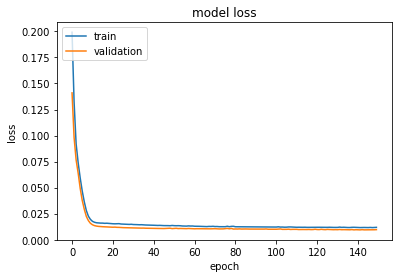

In [41]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Make Predictions

In [43]:
y_test_predictions = model.predict(X_test)

In [46]:
scaler_y.inverse_transform(y_test[0:5])

array([[27357.],
       [ 1213.],
       [11401.],
       [13996.],
       [ 5681.]])

In [47]:
scaler_y.inverse_transform(y_test_predictions[0:5])

array([[26304.22 ],
       [ 4512.376],
       [11836.422],
       [10813.733],
       [ 8193.1  ]], dtype=float32)

# Try to maximize it

In [48]:
Xnew = np.array([[40, 0, 26, 9000, 8000]])

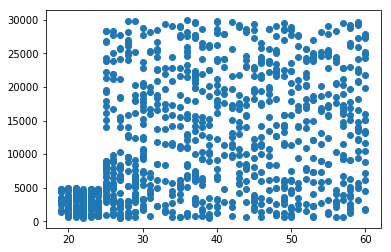

In [117]:
plt.scatter(
    df.age.values,
    df.sales.values
)

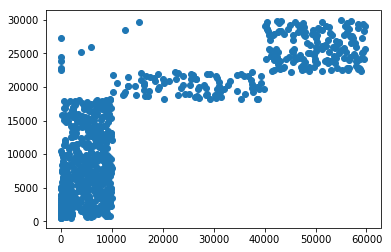

In [118]:
plt.scatter(
    df.debt.values,
    df.sales.values
)

In [53]:
np.cov(df.age.values, df.sales.values)

array([[1.51064702e+02, 3.89479743e+04],
       [3.89479743e+04, 8.07643163e+07]])

In [55]:
df.corr()

,age,gender,miles,debt,income,sales
age,1.000000,-0.000702,0.232399,0.218896,0.239644,0.352609
gender,-0.000702,1.000000,-0.031355,-0.033181,-0.034317,-0.036350
miles,0.232399,-0.031355,1.000000,0.544791,0.422141,0.636676
debt,0.218896,-0.033181,0.544791,1.000000,0.491790,0.835541
income,0.239644,-0.034317,0.422141,0.491790,1.000000,0.674685
sales,0.352609,-0.036350,0.636676,0.835541,0.674685,1.000000


In [56]:
import seaborn as sns

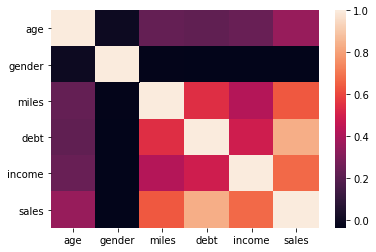

In [57]:
sns.heatmap(
    df.corr()
)

In [58]:
import tensorflow as tf
a = [1, 10, 26.9, 2.8, 166.32, 62.3]
b = tf.math.argmax(input = a)
c = tf.keras.backend.eval(b)

In [63]:
df.age.min()

19

In [81]:
step = 0.0001
x_grid_scaled = np.array([
    np.arange(0, 1, step),
    np.arange(0, 1, step),
    np.arange(0, 1, step),
    np.arange(0, 1, step),
    np.arange(0, 1, step),
]).T



In [114]:
y_test_predictions_grid = model.predict(x_grid_scaled)

y_argmax = tf.math.argmax(input = y_test_predictions_grid)
argmax_index = tf.keras.backend.eval(y_argmax)

In [116]:
x_grid_scaled[argmax_index]

array([[0.9999, 0.9999, 0.9999, 0.9999, 0.9999]])

Above we have our argmax-not terribly surprising considering most of these relationships are likely linear. Even debt has as positive correlation to sale price. 

In [89]:
scaler_y.inverse_transform(y_test_predictions_grid).max()

34669.984

In [111]:
scaler_y.inverse_transform(model.predict(x_grid_scaled[9999].reshape(1, -1)))

array([[34669.984]], dtype=float32)

In [113]:
scaler_y.inverse_transform(model.predict(x_grid_scaled[5000].reshape(1, -1)))

array([[21489.26]], dtype=float32)

In [ ]:
# Essentially can perform a generic grid search 